# Northwestern County Real Estate
By Victor Mwatu DSF-05

***

<div>
<center><img src="data/19256b1d974c217158df92d9871eaa58.avif" height="300"/></center>
</div>

## 1. Overview

Based on the Northwestern county real estate data set, this is a real estate analysis for a hypothetical real estate agency to find trends and useful information that can be applied to improve sales.

## 2. Business Problem
Using the sales data we want to predict sales of properties for a real estate agency. We are looking for features that may be used as a predictor of sale price for houses so that the agency can know what to look for in a property to increase its valuation and hence profit. We are going to use linear regression analysis to predict the features with the most correlation to sales price.

## 3. Data Understanding

The first step is to take a look at the data so as to have an overview of the column contents. Check whether they are numeric or categorical. Drop non-essential rows. 

In [74]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [75]:
#Load data to pandas Dataframe for analysis
data = pd.read_csv('data/kc_house_data.csv')
data.drop(['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [76]:
#View columns data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


### 3.1 Drop rows
Rows to be dropped are duplicated rows, and rows with blanks.

In [77]:
#Check for duplicates
duplicates = data[data.duplicated(subset='id')]
duplicates

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
94,6021501535,700000.0,3,1.50,1580,5000,1.0,NO,Average,8 Good,1939
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,NO,Average,11 Excellent,1997
325,7520000520,240500.0,2,1.00,1240,12092,1.0,NO,Average,6 Low Average,1922
346,3969300030,239900.0,4,1.00,1000,7134,1.0,NO,Average,6 Low Average,1943
372,2231500030,530000.0,4,2.25,2180,10754,1.0,NO,Very Good,7 Average,1954
...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,645000.0,4,3.50,2910,5260,2.0,NO,Average,9 Better,2012
20597,2724049222,220000.0,2,2.50,1000,1092,2.0,NO,Average,7 Average,2004
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,NaN,Average,8 Good,2013
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,NO,Average,7 Average,1933


In [78]:
#Drop duplicates 
data = data.drop_duplicates(subset=['id'])
#Drop rows with missing data
data.dropna(inplace=True)
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009


### 3.2 Categorical data
A quick look at the categorical data to determine which to use in our model.

In [79]:
#Look at the categorical data
print(data['waterfront'].value_counts())
print(data['condition'].value_counts())
print(data['grade'].value_counts())
print(data['yr_built'].value_counts())

waterfront
NO     18921
YES      146
Name: count, dtype: int64
condition
Average      12367
Good          5030
Very Good     1501
Fair           145
Poor            24
Name: count, dtype: int64
grade
7 Average        7901
8 Good           5388
9 Better         2312
6 Low Average    1772
10 Very Good     1015
11 Excellent      354
5 Fair            205
12 Luxury          81
4 Low              25
13 Mansion         13
3 Poor              1
Name: count, dtype: int64
yr_built
2014    496
2006    404
2005    395
2003    372
2007    370
       ... 
1901     27
1933     25
1902     24
1935     22
1934     19
Name: count, Length: 116, dtype: int64


It appears that the year built and grade has too many categories which do not seem relevant so we will not use it but the rest are good candidates for analysis.

## 4. Modelling
Here we shall start the modelling process. This is going to establish the viability of our model against a baseline model. Then we are going to interpret the model to get a prediction of which features the real estate agency should focus on to predict the price of a house and hence the best returns.

### 4.1 Base line model
Explore correlation between numeric features to get a baseline independent variable, among the non categorical features.

In [80]:
#Find feature with the largest correlation anong numeric variables
data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']].corr()['price']

price          1.000000
bedrooms       0.310158
bathrooms      0.527745
sqft_living    0.704699
sqft_lot       0.086155
floors         0.257529
Name: price, dtype: float64

It appears the square foot living area is the feature with the biggest correlation and so it will be used as the baseline independent variable for our baseline model.  next we look at the base line model compared to our multiple model to check for viability.

In [81]:
#The dependent and independent variables
y = data['price']
X_base = data[['sqft_living']]
base_line_model = sm.OLS(y, sm.add_constant(X_base)).fit()
base_line_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.881e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:35:04   Log-Likelihood:            -2.6512e+05
No. Observations:               19067   AIC:                         5.302e+05
Df Residuals:                   19065   BIC:                         5.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.146e+04   4732.780    -10.874      0.000   -6.07e+04   -4.22e+04
sqft_living   284.6107      2.075    137.141      0.000     280.543     288.678
==============================================================================
Omnibus:                    13234.807   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           503163.931
Skew:                           2.861   Prob(JB):                         0.00
Kurtosis:                      27.507   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.2 Multiple numeric model
Next a regression analysis on multiple features.

In [82]:
#Multiple dependant variables
X_multiple = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]

multiple_numeric_model = sm.OLS(y, sm.add_constant(X_multiple)).fit()
multiple_numeric_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     4019.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:35:04   Log-Likelihood:            -2.6480e+05
No. Observations:               19067   AIC:                         5.296e+05
Df Residuals:                   19061   BIC:                         5.297e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.942e+04   8294.271      9.575      0.000    6.32e+04    9.57e+04
bedrooms    -6.182e+04   2539.136    -24.345      0.000   -6.68e+04   -5.68e+04
bathrooms    6616.6928   4121.839      1.605      0.108   -1462.477    1.47e+04
sqft_living   320.2604      3.368     95.100      0.000     313.660     326.861
sqft_lot       -0.4299      0.047     -9.129      0.000      -0.522      -0.338
floors      -2733.5708   4070.240     -0.672      0.502   -1.07e+04    5244.459
==============================================================================
Omnibus:                    12790.853   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           441717.055
Skew:                           2.748   Prob(JB):                         0.00
Kurtosis:                      25.930   Cond. No.                     2.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.3 Multiple categorical data


Now we perform an analysis with categorical data included.

In [83]:
#Independent variables with categorical data included
X_mult_cat = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'waterfront']]
X_mult_cat = pd.get_dummies(X_mult_cat, columns=['condition', 'waterfront'], dtype=int, drop_first=True)
X_mult_cat
model_categorical = sm.OLS(y, sm.add_constant(X_mult_cat)).fit()
model_categorical.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     2403.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:            -2.6389e+05
No. Observations:               19067   AIC:                         5.278e+05
Df Residuals:                   19056   BIC:                         5.279e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.147e+04   8397.974      3.747      0.000     1.5e+04    4.79e+04
bedrooms            -5.715e+04   2435.621    -23.465      0.000   -6.19e+04   -5.24e+04
bathrooms            1.033e+04   3947.193      2.618      0.009    2597.441    1.81e+04
sqft_living           304.9527      3.232     94.342      0.000     298.617     311.289
sqft_lot               -0.4077      0.045     -9.066      0.000      -0.496      -0.320
floors               1.625e+04   4010.691      4.053      0.000    8393.569    2.41e+04
condition_Fair      -9999.2413   2.08e+04     -0.480      0.631   -5.08e+04    3.08e+04
condition_Good       4.534e+04   4361.360     10.396      0.000    3.68e+04    5.39e+04
condition_Poor       2.189e+04   5.07e+04      0.431      0.666   -7.76e+04    1.21e+05
condition_Very Good  1.186e+05   6902.726     17.183      0.000    1.05e+05    1.32e+05
waterfront_YES       8.147e+05   2.08e+04     39.135      0.000    7.74e+05    8.56e+05
==============================================================================
Omnibus:                    11788.708   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388364.443
Skew:                           2.445   Prob(JB):                         0.00
Kurtosis:                      24.562   Cond. No.                     1.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
mean_house_living_area = data['sqft_living'].mean()
mean_house_living_area

2085.3223894687158

## 5. Findings

The final model is statistically significant overall and explains 55% of the variance in house sale price. This is about 6% more variance explained than our base line model and 5% more than our numeric model. Using an alpha of 0.05 our intercept is statistically significant and only coefficients of fair and poor house condition are not significant.
 
The biggest predictors of house sale price with the most impact seem to be square footage of living area followed by number of bathrooms, floors and whether or not a house has a waterfront. Although it may not seem large, it has a big impact in that it probably varies by a lot since it is a small measurement compared to the total size. This four features are the ones that are going to be reported on to the stakeholder. The overall condition of the house is going to be left out as some measures seem to be insignificant.

### 5.1 Findings report
With an increase of one bathroom we expect to see an increase of $10,000 in house price. With one floor increase the sale price would be predicted to increase by $17,000. A house with a waterfront is likely to be $800,000 more expensive than a house without. Each square footage of a house increases its value by $301. To put this in perspective a hypothetical house with zero square footage sells at a price of $35,000, and the average square footage of a house is 2,080. 

### 5.2 Visualization of findings

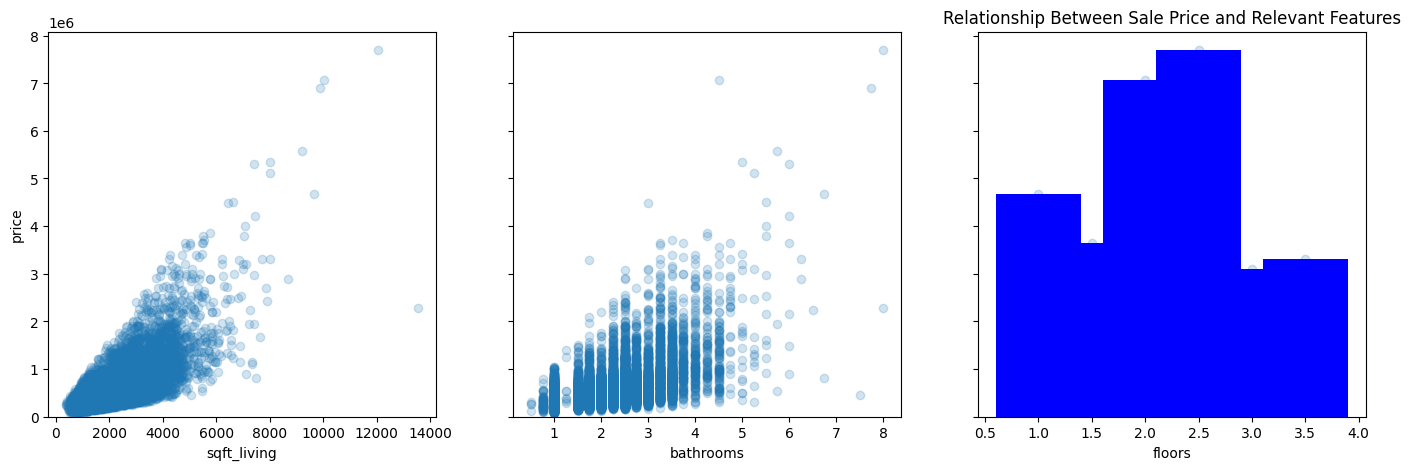

In [86]:
fig, axes = plt.subplots(ncols=3, figsize=(17,5), sharey=True)
axes[0].set_ylabel('price')

for i, col in enumerate(data[['sqft_living', 'bathrooms', 'floors']].columns):
    ax = axes[i]
    ax.scatter(data[col], data['price'], alpha=0.2)
    ax.set_xlabel(col)
ax.bar(data['floors'], data['price'], color='blue')
ax.set_title('Relationship Between Sale Price and Relevant Features');

## Conclusion

The four main predictors of house sale price for our real estate agency to focus on are:

    1. Square footage of living area

    2. Number of bathrooms in a house

    3. Number of floors
     
    4. Whether or not a house has a waterfront

Living area space seems to be the main predictor and waterfront houses sell at the highest prices. These should be the foremost considerations when considering houses to sell.